# Pre-trained word embedding

Word embedding represents words into vector forms, where the similar words have the similar representation.
We study the the three pre-trained word embeddings from google, standford nlp and spacy. We will show the word embedding can represent the words with similar meanings.

In [1]:
import pandas as pd
import numpy as np
import spacy
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.manifold import TSNE
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Google: pre-trained word embedding

A pretrained word embedding can be found from Google's word2vec project (see the link: https://code.google.com/archive/p/word2vec/)
<br>
We download the file, 'GoogleNews-vectors-negative300.bin', and save it in the same local directory.

It can be loaded by using the gensim library.

In [2]:
googlemodel = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

We consider the words from the different categories, 'fruit', 'transport' and 'weather', respectively. We create the word
vector from this word embedding. We will show the words can be grouped in the same cluster if they are in the same category.

In [3]:
dict = {}
dict['fruit'] = [['apple', 'orange', 'banana', 'strawberry', 'plum', 'pineapple'], 'navy']
dict['transport'] = [['scooter', 'lorry', 'taxi', 'bike', 'plane', 'boat'], 'turquoise']
dict['weather'] = [['warm', 'storm', 'snow', 'rain', 'fog', 'cloud'], 'darkorange']

Represent the words into vectors from the Google's word embedding

In [4]:
word_vector = []
for key, item in dict.items():
    for x in item[0]:
        word_vector.append((x, googlemodel[x].reshape(1,-1), item[1]))

Plot of clustering using tSNE

In [5]:
def plot_TSNEClustering(word_vector):
    color = []
    X = word_vector[0][1]
    color.append(word_vector[0][2])
    for x in word_vector[1:]:
        X = np.concatenate((X, x[1]), axis=0)
        color.append(x[2])
    tsne = TSNE(n_components=2, perplexity=5, verbose=0, init="pca", random_state=0, n_iter=10000).fit_transform(X)
    
    x = tsne[:,0]
    y = tsne[:,1]

    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(x, y, color=color)

    for item, x1, y1 in zip(word_vector, x, y):
        ax.annotate(item[0], (x1, y1), size=16)

    plt.show()

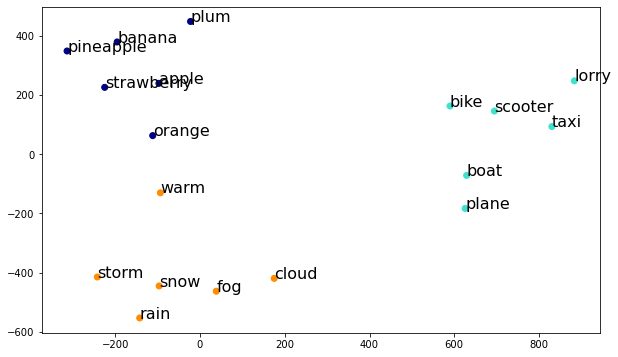

In [6]:
plot_TSNEClustering(word_vector)

The words in the same category will form its own cluster.

# Standford: pre-trained word embedding

Another pretrained word embedding can be found in Standford NLP (see the link: https://github.com/stanfordnlp/GloVe)
<br>
We download the word-embedding file, 'glove.6B.300d.txt'.

To load the word embedding using genism library. It is required to convert it using the function, glove2word2vec.

In [7]:
input_file = 'glove.6B.300d.txt'
output_file = 'glove_6B_300d'
glove2word2vec(input_file, output_file)

(400001, 300)

In [8]:
standfordmodel = KeyedVectors.load_word2vec_format(output_file, binary=False)

Represent the words into vectors using the standardnlp's word embedding

In [9]:
word_vector = []
for key, item in dict.items():
    for x in item[0]:
        word_vector.append((x, standfordmodel[x].reshape(1,-1), item[1]))

Plot of clustering using tSNE

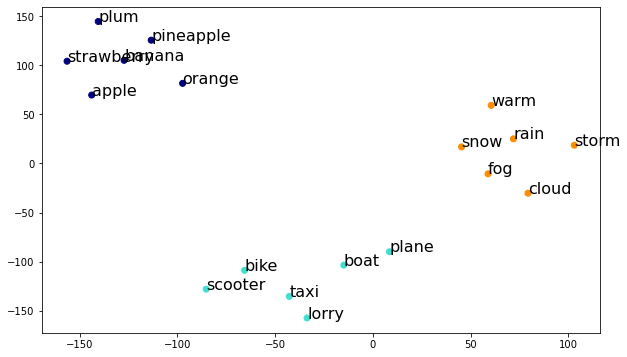

In [10]:
plot_TSNEClustering(word_vector)

The words, in the same category, are shown in the same cluster.

# Spacy: pre-trained word embedding

A pretrained word embedding can be in spacy model. It can be downloaded in the following command:
<br>
python -m spacy download en_core_web_lg

In [11]:
nlp = spacy.load('en_core_web_lg')

Represent the words into vectors using the spacy's word embedding

In [12]:
word_vector = []
for key, item in dict.items():
    for x in item[0]:
        doc = nlp(x)
        word_vector.append((x, doc.vector.reshape(1,-1), item[1]))

Plot of clustering using tSNE

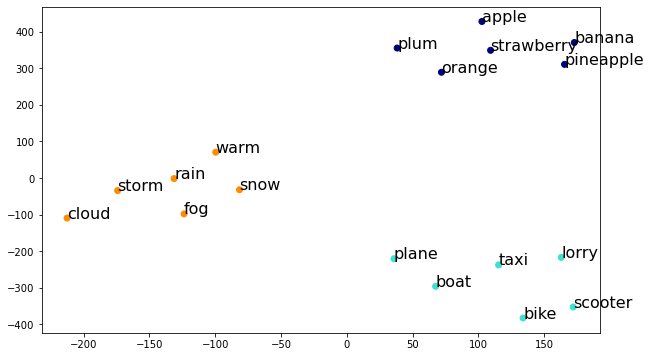

In [13]:
plot_TSNEClustering(word_vector)

The words, in the same category, are grouped in the same cluster.

# Finding similar words using word embedding

The word embedding can be used to find the similar words of a given word.

In [14]:
def similar_wordcloud(model, word):
    # finding similar words from word embedding for glove
    similar_word = model.most_similar(word)
    similar_word = [w[0] for w in similar_word]
    text = " ".join(similar_word)
    wordcloud = WordCloud(collocations=False).generate(text)
    plt.figure(figsize=(10,5))
    plt.title(word, fontsize=24)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

We consider a word, 'football'.

In [15]:
word = 'football'

<b> Google similar words

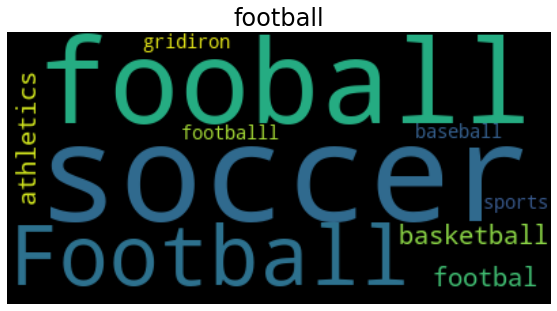

In [16]:
similar_wordcloud(googlemodel, word)

<b> Standard NLP similar words

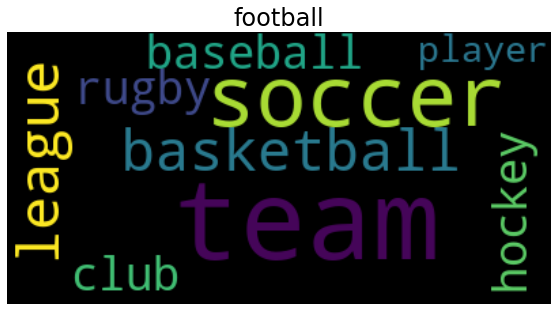

In [17]:
similar_wordcloud(standfordmodel, word)

<b> Spacy similar words

In [18]:
def spacy_similarwords(model, word):
    vector = np.asarray([nlp.vocab.vectors[nlp.vocab.strings[word]]])
    similarvector = nlp.vocab.vectors.most_similar(vector, n=20)
    similarwords = [nlp.vocab.strings[w].lower() for w in similarvector[0][0]]
    return list(set(similarwords))

In [19]:
similar_word = spacy_similarwords(nlp, word)

(-0.5, 399.5, 199.5, -0.5)

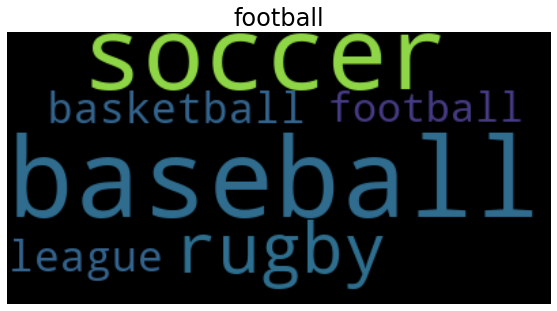

In [20]:
text = " ".join(similar_word)
wordcloud = WordCloud(collocations=False).generate(text)
plt.figure(figsize=(10,5))
plt.title(word, fontsize=24)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

The similar words, from the three different word embedding, are related to the meaning of football or sports.